# Arvore de decisão

## Importações

In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split
from scipy.stats import randint

import model_pipeline

seed = 777
rng = np.random.default_rng(seed)

def rng_int():
    return rng.integers(1, 10000)

In [3]:
df = pd.read_csv('../data/preprocessed/_90_drp_outl.csv', index_col='obj_ID')

X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=rng_int())

kfold = KFold(n_splits=5, shuffle=True, random_state=rng_int())

pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier()) # Classificador
])

# Definir a distribuição de parâmetros para random search
param_dist = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__splitter': ['best', 'random'],
    'classifier__min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

best_model, best_params, best_score = model_pipeline.get_best_params(pipeline, param_dist, kfold, X_train, y_train)

print("Melhores parâmetros:", best_params)
print("Melhor acurácia:", best_score)

Melhores parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 50, 'classifier__max_features': 'log2', 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_leaf': 12, 'classifier__min_samples_split': 8, 'classifier__splitter': 'best'}
Melhor acurácia: 0.9703312505821575


In [13]:
model_pipeline.dump_model(best_model, 'dump/decision_tree', X_test, y_test)

In [6]:
from win10toast import ToastNotifier

def notificar(titulo, mensagem):
    toaster = ToastNotifier()
    toaster.show_toast(titulo, mensagem, duration=10)

notificar("Tarefa Concluída", "Seu código terminou de rodar!")

WNDPROC return value cannot be converted to LRESULT


TypeError: WPARAM is simple, so must be an int object (got NoneType)

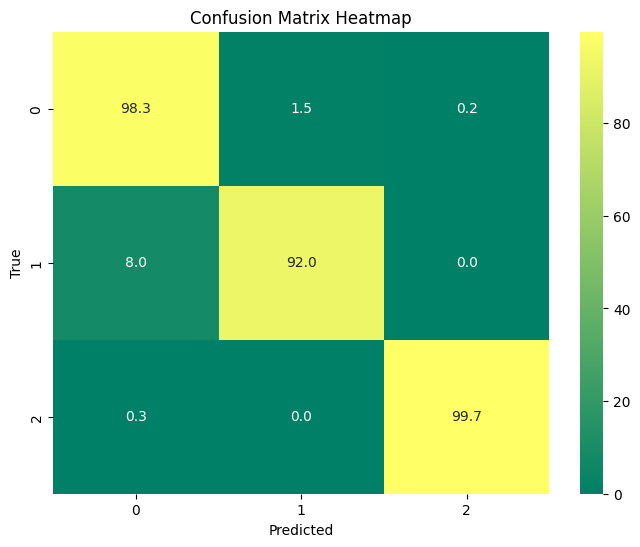

In [7]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='summer')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()